## ASSIGNMENT 2-3

In [28]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [40]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Kaggle: IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions such as:
### 1. Show a breakdown of distance from home by job role and attrition.


In [29]:
breakdown = df.groupby(['Department', 'Attrition'])["DistanceFromHome"].sum().reset_index()
breakdown


,Department,Attrition,DistanceFromHome
0,Human Resources,No,387
1,Human Resources,Yes,161
2,Research & Development,No,7423
3,Research & Development,Yes,1365
4,Sales,No,3183
5,Sales,Yes,994


### Data Visualisation using Seaborn

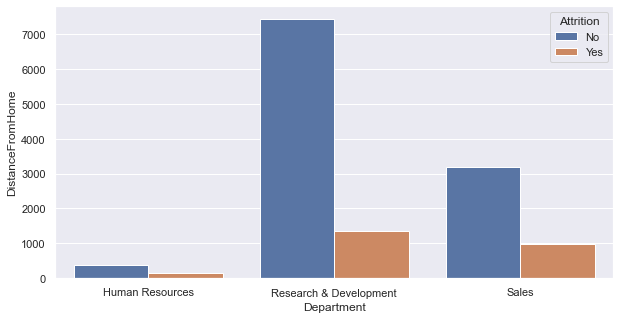

In [64]:
sns.barplot(x="Department", y="DistanceFromHome", hue="Attrition", data=breakdown)
sns.set(rc={'figure.figsize':(5,2.5)})

### 2. Compare average monthly income by education and attrition.

In [41]:
df['MonthylyIncome'] = df['DailyRate']*df['StandardHours']
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthylyIncome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,88160
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,22320
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,109840
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,111360
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,47280


In [53]:
Average = df.groupby(['Education', 'Attrition'])['MonthylyIncome'].mean().reset_index()
Average

,Education,Attrition,MonthylyIncome
0,1,No,65642.589928
1,1,Yes,66469.677419
2,2,No,66791.932773
3,2,Yes,60227.272727
4,3,No,63507.653277
5,3,Yes,57940.202020
6,4,No,65913.882353
7,4,Yes,59280.000000
8,5,No,62204.651163
9,5,Yes,68400.000000


### Data Visualisation using Seaborn

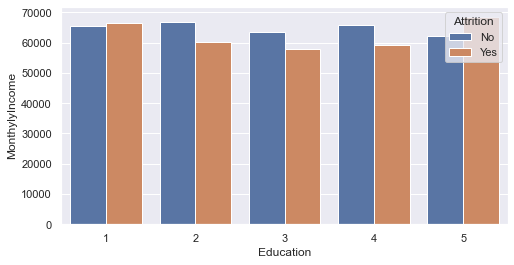

In [66]:
sns.barplot(x="Education", y="MonthylyIncome", hue="Attrition", data=Average )
sns.set(rc={'figure.figsize':(5,2.5)})